In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("output.csv")

In [5]:
df.describe()

,h_0,h_1,h_2,h_3,y
count,16842.000000,16842.000000,16842.000000,16842.000000,16842.000000
mean,0.659325,0.279860,-0.195270,-0.538713,0.009428
std,0.214240,0.273625,0.289011,0.654753,0.509131
min,-0.451877,-0.768805,-0.500000,-1.000000,-1.000000
25%,0.618602,0.080793,-0.406250,-1.000000,-0.325000
50%,0.618602,0.353641,-0.269231,-1.000000,0.000000
75%,0.796274,0.523188,0.000000,0.000000,0.356898
max,1.000000,0.523188,1.000000,3.000000,1.000000


In [6]:
len(df)

16842

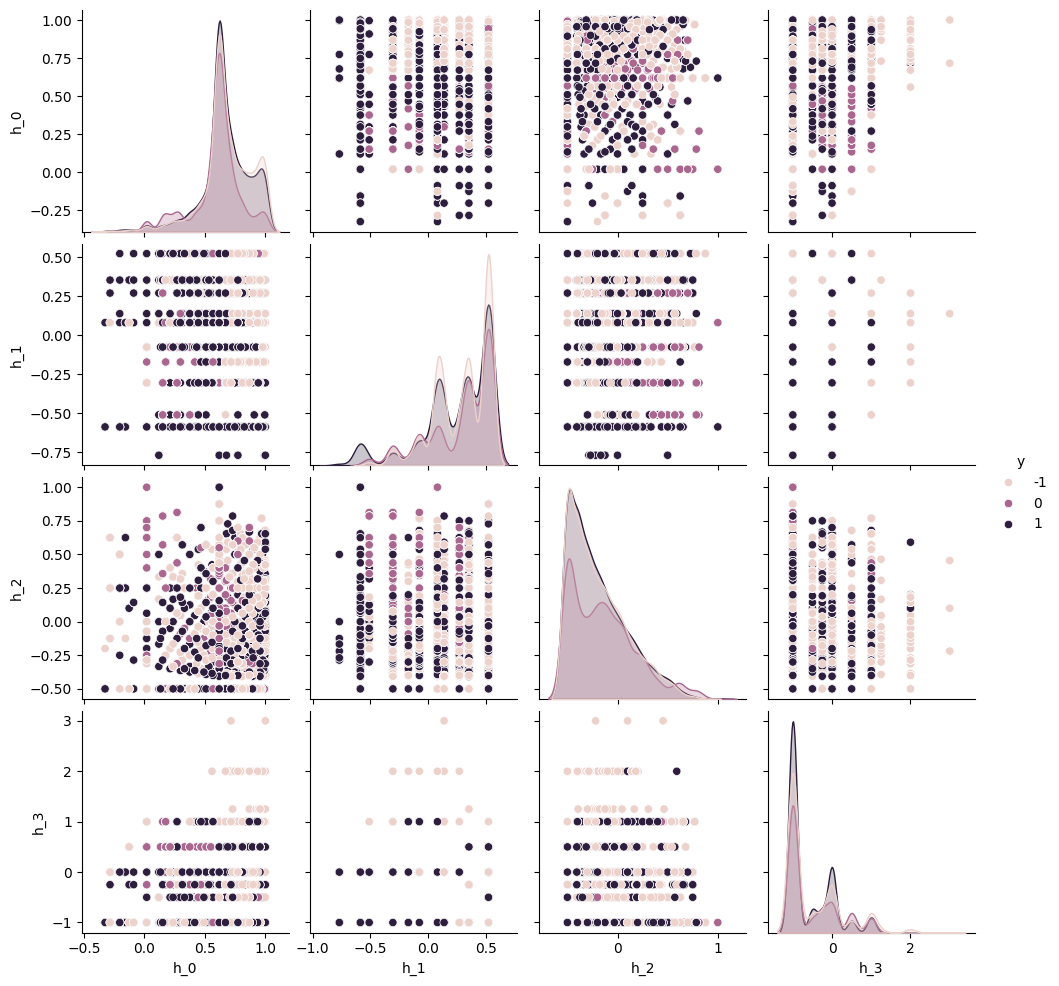

In [37]:
sns.pairplot(df, hue="y")

In [61]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Text(95.72222222222221, 0.5, 'Truth')

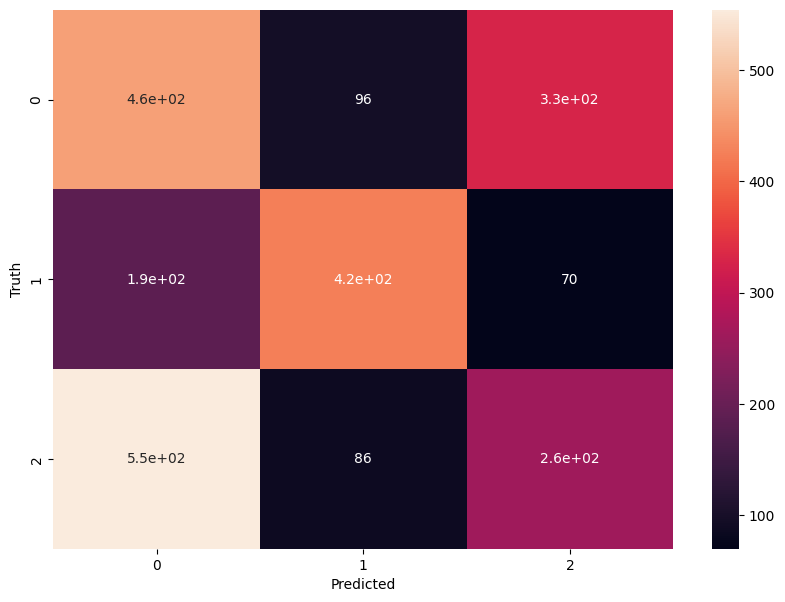

In [35]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [36]:
len(X_test)

2470

In [10]:
# Train a regression model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Change x and y to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=15)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

""" param_grid = {
    "n_estimators": np.linspace(100, 500, 5, dtype=int),
    "learning_rate": np.linspace(0.01, 0.1, 5),
    "max_depth": np.linspace(5, 20, 5, dtype=int),
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=2,
)
grid_search.fit(X_train, y_train)

best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) """

0.5887051938960487


' param_grid = {\n    "n_estimators": np.linspace(100, 500, 5, dtype=int),\n    "learning_rate": np.linspace(0.01, 0.1, 5),\n    "max_depth": np.linspace(5, 20, 5, dtype=int),\n}\n\ngrid_search = GridSearchCV(\n    estimator=GradientBoostingRegressor(),\n    param_grid=param_grid,\n    cv=3,\n    n_jobs=-1,\n    scoring="neg_mean_squared_error",\n    verbose=2,\n)\ngrid_search.fit(X_train, y_train)\n\nbest_reg = grid_search.best_estimator_\ny_pred = best_reg.predict(X_test)\nnp.sqrt(mean_squared_error(y_test, y_pred)) '

In [11]:
# Save the best model
import joblib

joblib.dump(reg, "model.pkl")

# Load the model
model = joblib.load("model.pkl")
model.predict(X_test)

array([-0.75782841,  0.98293642,  0.05299675, ...,  0.70518422,
        0.00807911,  0.15418651])

In [66]:
y_pred

array([-0.05186488, -0.71924949, -0.99999802, ...,  0.89623511,
        0.41377873,  0.00424203])